<a href="https://colab.research.google.com/github/eric-sun92/pytorch_intro/blob/01_pytorch_workflow/02_pytorch_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sklearn

from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples, 
                    noise=0.03,
                    random_state=42)


In [ ]:
print(f"first 5 samples of X:\n {X[:5]}")
print(f"first 5 samples of y: {y[:5]}")


first 5 samples of X:
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
first 5 samples of y: [1 1 1 1 0]


In [ ]:
import pandas as pd
circles = pd.DataFrame({"X1": X[:, 0],
                       "X2": X[:, 1],
                       "label": y})

circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


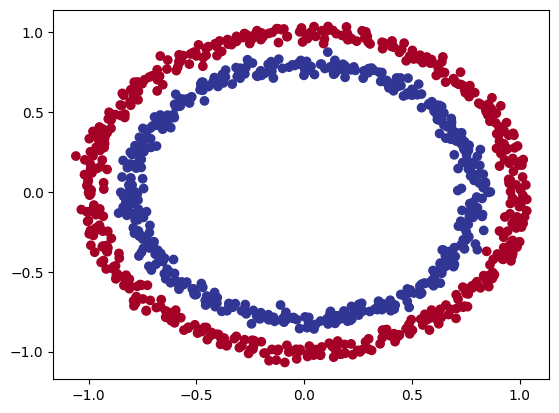

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(x=X[:, 0], 
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu)

In [ ]:
# note: the data we are working with is often reffered to as a toy data set

In [ ]:
# turn data from numpy to tensors
import torch

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

len(X_train), len(X_test)

(800, 200)

In [ ]:
torch.manual_seed(42)

# build model to classify red/blue dots

# 1. setup device agnostic code

device = 'cuda' if torch.cuda.is_available() else 'cpu'

y_train = y_train.to(device)
y_test = y_test.to(device)
X_train = X_train.to(device)
X_test = X_test.to(device)

# 2. construct a model (by subclassing nn.Module)

1. Subclass of nn.Module
2. Create nn.Linear() layers that are capable of handling the shapes of our data
3. Define forward() function that outlines forward pass/computation of model
4. instantiate an instance of our model class and send it to target device 


In [ ]:
from sklearn import model_selection
from torch import nn
torch.manual_seed(42)

class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = nn.Linear(in_features=2, out_features=5)
    self.layer2 = nn.Linear(in_features=5, out_features=1)

  def forward(self, x):
    return self.layer_2(self.layer_1(x))


model_02 = CircleModelV0()

model_02.to(device)

model_2 = nn.Sequential(
  nn.Linear(in_features=2, out_features=5),
  nn.Linear(in_features=5, out_features=1)
).to(device)

model_2.state_dict()



OrderedDict([('0.weight',
              tensor([[-0.0829, -0.2872],
                      [ 0.4691, -0.5582],
                      [-0.3260, -0.1997],
                      [-0.4252,  0.0667],
                      [-0.6984,  0.6386]], device='cuda:0')),
             ('0.bias',
              tensor([-0.6007,  0.5459,  0.1177, -0.2296,  0.4370], device='cuda:0')),
             ('1.weight',
              tensor([[ 0.0697,  0.3613,  0.0489, -0.1410,  0.1202]], device='cuda:0')),
             ('1.bias', tensor([-0.1213], device='cuda:0'))])

In [ ]:
# make predictions
model_2.to(device)

model_2.eval()
with torch.inference_mode():
  untrained_y = model_2(X_test.to(device))

print(f"length of predictions:{len(untrained_y)}, Shape: {untrained_y.shape}")
print(f"length of test samples: {len(X_test)}, Shape: {X_test.shape}")
print(f"First 10 predictions: {untrained_y[:10]}")
print(f"First 10 labels: {y_test[:10]}")



length of predictions:200, Shape: torch.Size([200, 1])
length of test samples: 200, Shape: torch.Size([200, 2])
First 10 predictions: tensor([[-0.0338],
        [-0.0309],
        [ 0.0894],
        [-0.0692],
        [ 0.2967],
        [ 0.2968],
        [ 0.1405],
        [ 0.2178],
        [ 0.0805],
        [-0.0284]], device='cuda:0')
First 10 labels: tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0')


In [ ]:
# setup loss function
# loss_fn = nn.BCELoss() # requires inputs to have gone through sigmoid activation function prior to input to BCELoss
loss_fn = nn.BCEWithLogitsLoss() # has sigmoid activation function built in

optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.1)



In [ ]:
# calcualte accuracy

def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = correct / len(y_pred) * 100
  return acc


In [ ]:
# train model

# go from raw logit -> prediction probabilities -> prediction labels

# model output will be raw logits -> pass through activation function
# (for Binary cross entropy - sigmoid, for multiclassification - softmax)
# convert to prediction labels using round or argmax

model_2.eval()
with torch.inference_mode():
  y_logits = model_2(X_test.to(device))[:5]

y_pred_probs = torch.sigmoid(y_logits)

In [ ]:
y_preds = torch.round(y_pred_probs)

# can just do all that in one line
y_pred_labels = torch.round(torch.sigmoid(model_2(X_test.to(device))))
y_pred_labels.squeeze()

tensor([0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0.,
        0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1.,
        0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1.,
        1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1.,
        0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1.,
        1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1.,
        1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1.,
        1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
        1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1.,
        0., 1.], device='cuda:0', grad_fn=<SqueezeBackward0>)

In [ ]:
#building the training and test loop

num_epochs = 200
torch.manual_seed(42)
torch.cuda.manual_seed(42)

for epoch in range(num_epochs):

  model_2.train()

  y_logits = model_2(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn(y_logits, 
                 y_train)
  
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_02.eval()
  with torch.inference_mode():
    test_logits = model_2(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits,
                  y_test)

    test_acc = accuracy_fn(y_true=y_test,
                      y_pred=test_pred)

  if epoch % 20 == 0:
    print(f"epoch: {epoch} - Loss: {loss}, Accuracy: {acc} | testLoss: {test_loss}, testAcc: {test_acc}")


epoch: 0 - Loss: 0.6979604959487915, Accuracy: 51.87500000000001 | testLoss: 0.6943961381912231, testAcc: 57.99999999999999
epoch: 20 - Loss: 0.6949015855789185, Accuracy: 51.625 | testLoss: 0.692543625831604, testAcc: 49.5
epoch: 40 - Loss: 0.6940092444419861, Accuracy: 50.875 | testLoss: 0.6923156380653381, testAcc: 51.0
epoch: 60 - Loss: 0.6936231851577759, Accuracy: 50.0 | testLoss: 0.6923912763595581, testAcc: 51.5
epoch: 80 - Loss: 0.6934223175048828, Accuracy: 49.875 | testLoss: 0.6925414800643921, testAcc: 50.0
epoch: 100 - Loss: 0.6933070421218872, Accuracy: 49.25 | testLoss: 0.6927053928375244, testAcc: 53.0
epoch: 120 - Loss: 0.6932352781295776, Accuracy: 50.24999999999999 | testLoss: 0.692862331867218, testAcc: 53.0
epoch: 140 - Loss: 0.6931869983673096, Accuracy: 50.625 | testLoss: 0.6930059790611267, testAcc: 54.0
epoch: 160 - Loss: 0.6931520104408264, Accuracy: 51.37500000000001 | testLoss: 0.6931353807449341, testAcc: 56.00000000000001
epoch: 180 - Loss: 0.6931251883506

In [ ]:
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
  print("helper_functions already exists, skip downlaod")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)


In [ ]:
from helper_functions import plot_predictions, plot_decision_boundary

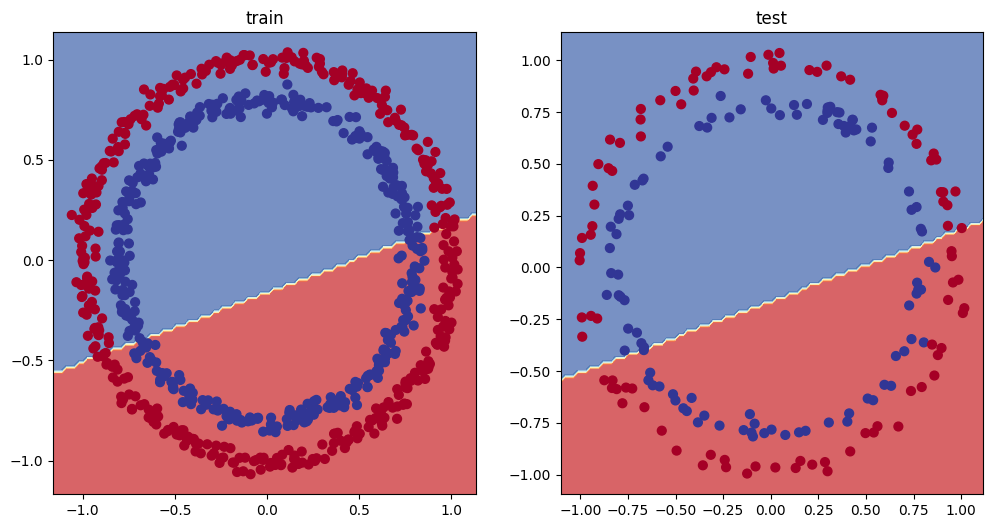

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("train")
plot_decision_boundary(model_2, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("test")
plot_decision_boundary(model_2, X_test, y_test)

In [ ]:
#this model doesn't work well, lets imporve it next

# ways to improve from model's perspective

1. add more layers - give model more chances to learn about patterns
2. add more hidden units - go from 5 hidden units to 10 hidden units
3. fit for longer
4. chaning activation functions
5. adjust learning rate
6. change loss function

In [ ]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = nn.Linear(in_features=1, out_features=10)
    self.layer2 = nn.Linear(in_features=10, out_features=10)
    self.layer3 = nn.Linear(in_features=10, out_features=1)

  def forward(self, x):
    return self.layer3(self.layer2(self.layer1(x)))

model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer1): Linear(in_features=1, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=10, bias=True)
  (layer3): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

torch.manual_seed(42)
torch.cuda.manual_seed(42)

num_epochs = 1000

for epoch in range(num_epochs):

  model_1.train()

  y_logits = model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn(y_logits, y_train)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_1.eval()

  with torch.inference_mode():
    y_logits_test = model_1(X_test).squeeze()
    y_pred_test = torch.round(torch.sigmoid(y_logits_test))

    test_loss = loss_fn(y_logits_test, y_test)
    test_acc = accuracy_fn(y_true=y_test,
                      y_pred=y_pred_test)
    

  if epoch % 100 == 0:
    print(f"testLoss: {test_loss}, testAcc: {test_acc}")



testLoss: 0.7023008465766907, testAcc: 48.5
testLoss: 0.6976144909858704, testAcc: 46.5
testLoss: 0.6961708664894104, testAcc: 46.5
testLoss: 0.6954987645149231, testAcc: 45.5
testLoss: 0.6951438784599304, testAcc: 45.5
testLoss: 0.6949467062950134, testAcc: 45.5
testLoss: 0.6948345303535461, testAcc: 46.0
testLoss: 0.6947697997093201, testAcc: 46.0
testLoss: 0.6947322487831116, testAcc: 46.0
testLoss: 0.694710373878479, testAcc: 46.0


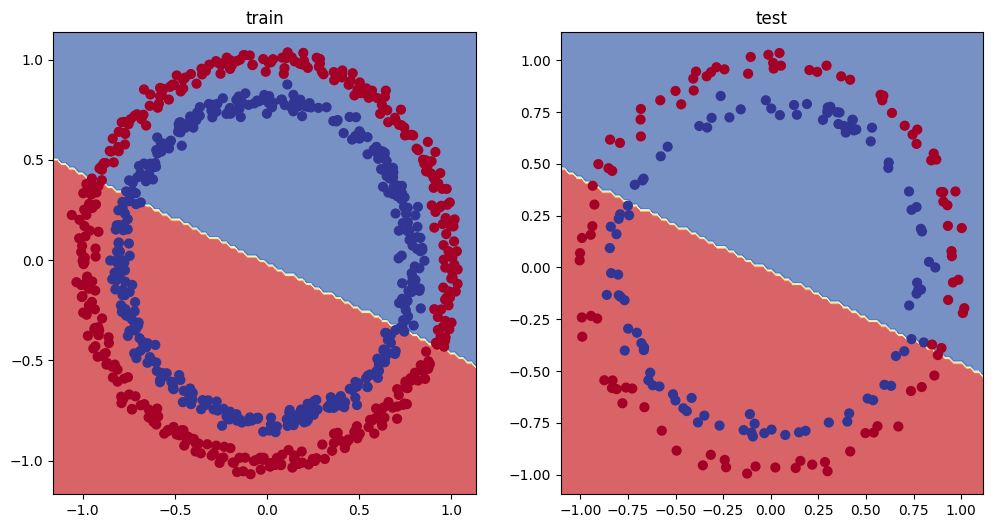

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("test")
plot_decision_boundary(model_1, X_test, y_test)

80 20
loss: 0.7092157602310181
loss: 0.3695824146270752
loss: 0.047119446098804474
loss: 0.02519291639328003
loss: 0.011827920563519001
loss: 0.0022406100761145353
loss: 0.0023641034495085478
loss: 0.002487626625224948
loss: 0.0026107057929039
loss: 0.0027339921798557043


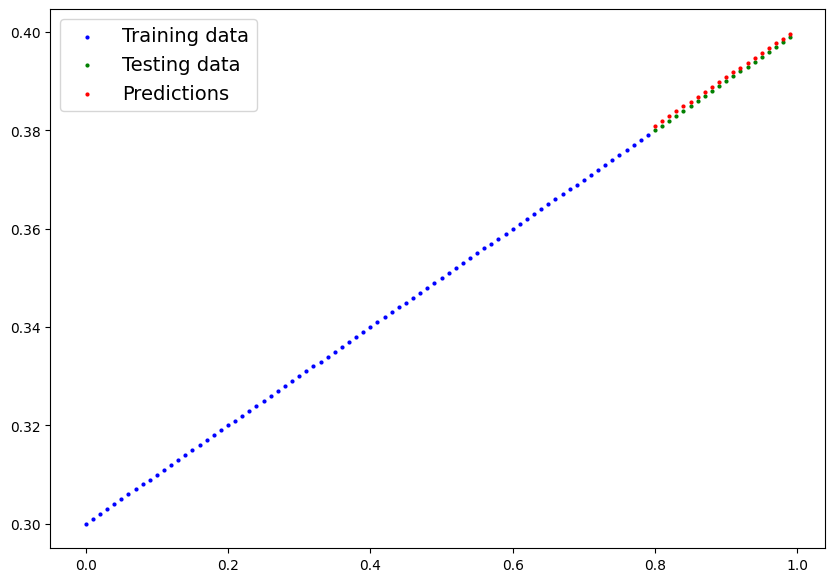

In [ ]:
weight = 0.1
bias = 0.3

lin_X = torch.arange(0, 1, 0.01).unsqueeze(dim=1)
lin_y = weight * lin_X + bias

split = int(0.8 * len(lin_X))

Xtrain = lin_X[:split].to(device)
Xtest = lin_X[split:].to(device)

ytrain = lin_y[:split].to(device)
ytest = lin_y[split:].to(device)


print(len(Xtrain), len(Xtest))

model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)

loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.001)

for epoch in range(1000):

  model_2.train()
  ylogits = model_2(Xtrain)
  ypreds = torch.round(torch.sigmoid(ylogits))

  loss = loss_fn(ylogits, ytrain)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_2.eval()
  with torch.inference_mode():
    test_ylogits = model_2(Xtest)
    # test_ypreds = torch.round(torch.sigmoid(test_ylogits))

    test_loss = loss_fn(test_ylogits, ytest)
    # test_acc = accuracy_fn(test_ypreds, ytrain)

  if epoch % 100 == 0:
    print(f"loss: {test_loss}")
  
with torch.inference_mode():
  predictions = model_2(Xtest)

plot_predictions(train_data=Xtrain.cpu(), train_labels=ytrain.cpu(),
                 test_data=Xtest.cpu(), test_labels=ytest.cpu(), 
                 predictions=predictions.cpu())